In [64]:
import pandas as pd
df = pd.read_csv(r"G:\Ddrive\PG DBDA\12 Practical Machine Learning_\Cases\bike-sharing-demand/train.csv",parse_dates=['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [65]:
df['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [66]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
df['season'] = df['season'].astype('category')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [67]:
y = df[['casual','registered']]
y.head()

,casual,registered
0,3,13
1,8,32
2,5,27
3,3,10
4,0,1


In [68]:
X = df.drop(['datetime','casual','registered','count'],axis = 1)
print(X.head())

  season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0      1        0           0        1  9.84  14.395        81        0.0   
1      1        0           0        1  9.02  13.635        80        0.0   
2      1        0           0        1  9.02  13.635        80        0.0   
3      1        0           0        1  9.84  14.395        75        0.0   
4      1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  hour  weekday  
0  2011      1    1     0        5  
1  2011      1    1     1        5  
2  2011      1    1     2        5  
3  2011      1    1     3        5  
4  2011      1    1     4        5  


In [69]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
y_trn_scaled = scalerY.fit_transform(y)    
X_trn_scaled = scalerX.fit_transform(X)    

In [70]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_trn_scaled, y_trn_scaled, test_size = 0.1, 
                                                    random_state=2024)
X_train.shape

(9797, 13)

# OR

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_trn_scaled, y_trn_scaled, test_size = 0.1, 
                                                    random_state=2024,stratify=df['season'])
X_train.shape

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
tf.random.set_seed(2024)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'), 
    tf.keras.layers.Dense(2, activation='relu')  
])
print(model.summary())
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError(),metrics=['mae'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 112       
                                                                 
 dense_13 (Dense)            (None, 6)                 54        
                                                                 
 dense_14 (Dense)            (None, 3)                 21        
                                                                 
 dense_15 (Dense)            (None, 2)                 8         
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=7, verbose=2, mode='auto',
        restore_best_weights=True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/500
307/307 - 5s - loss: 0.0214 - val_loss: 0.0187 - 5s/epoch - 16ms/step
Epoch 2/500
307/307 - 1s - loss: 0.0158 - val_loss: 0.0162 - 1s/epoch - 4ms/step
Epoch 3/500
307/307 - 1s - loss: 0.0141 - val_loss: 0.0151 - 1s/epoch - 5ms/step
Epoch 4/500
307/307 - 1s - loss: 0.0132 - val_loss: 0.0143 - 1s/epoch - 4ms/step
Epoch 5/500
307/307 - 1s - loss: 0.0125 - val_loss: 0.0139 - 1s/epoch - 4ms/step
Epoch 6/500
307/307 - 1s - loss: 0.0118 - val_loss: 0.0131 - 1s/epoch - 4ms/step
Epoch 7/500
307/307 - 1s - loss: 0.0112 - val_loss: 0.0122 - 1s/epoch - 4ms/step
Epoch 8/500
307/307 - 1s - loss: 0.0109 - val_loss: 0.0118 - 1s/epoch - 4ms/step
Epoch 9/500
307/307 - 1s - loss: 0.0105 - val_loss: 0.0113 - 1s/epoch - 4ms/step
Epoch 10/500
307/307 - 1s - loss: 0.0103 - val_loss: 0.0110 - 1s/epoch - 4ms/step
Epoch 11/500
307/307 - 1s - loss: 0.0100 - val_loss: 0.0107 - 1s/epoch - 4ms/step
Epoch 12/500
307/307 - 1s - loss: 0.0098 - val_loss: 0.0104 - 1s/epoch - 4ms/step
Epoch 13/500
307/307 - 1

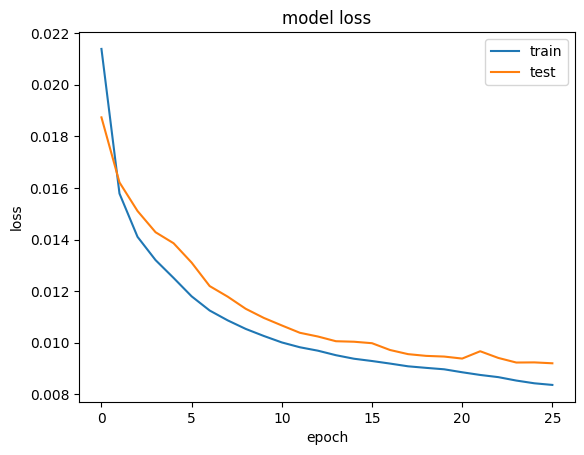

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [74]:
y_pred = model.predict(X_test)
y_pred[:5]

35/35 [==============================] - 0s 4ms/step


array([[0.04557891, 0.19442275],
       [0.06923427, 0.22489762],
       [0.1874257 , 0.27988753],
       [0.        , 0.00069091],
       [0.14536771, 0.18355827]], dtype=float32)

In [75]:
import numpy as np
#y_pred = np.array(y_pred).reshape(y_test.shape[0],2)
y_pred_orig = scalerY.inverse_transform(y_pred)
y_pred_orig[:5]

array([[ 16.72746  , 172.25856  ],
       [ 25.40898  , 199.2593   ],
       [ 68.78523  , 247.98035  ],
       [  0.       ,   0.6121438],
       [ 53.34995  , 162.63263  ]], dtype=float32)

In [76]:
y_test_org = scalerY.inverse_transform(y_test)
y_test_org[:5]

array([[  7., 107.],
       [ 21., 211.],
       [ 27., 125.],
       [  1.,   3.],
       [102., 184.]])

In [77]:
from sklearn.metrics import r2_score
R2 = r2_score(y_true=y_test_org,y_pred=y_pred_orig)
print(f"R2: {R2}")

R2: 0.5032441199368852


In [78]:
R2 = r2_score(y_true=y_test,y_pred=y_pred)
print(f"R2: {R2}")

R2: 0.5032441181468543
